# module import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
from tqdm.notebook import tqdm
import random
import tensorflow as tf
from functools import partial
import glob
AUTOTUNE = tf.data.experimental.AUTOTUNE

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))
tf.test.is_built_with_cuda()
print(tf.version.VERSION)

from albumentations import (Compose, Normalize, RandomBrightness, HueSaturationValue, RandomContrast, HorizontalFlip,Rotate)

from keras.models import Model, Sequential
from keras.layers import *
from keras.initializers import glorot_uniform
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.applications import DenseNet201, ResNet50, EfficientNetV2L, InceptionResNetV2, Xception, vgg19
from tensorflow.keras.applications.efficientnet import EfficientNetB3

import keras
from keras.callbacks import EarlyStopping, ModelCheckpoint

Num GPUs Available:  1
2.9.2


#unzip train/test dataset

In [2]:
%cd /content/drive/MyDrive/ColabNotebooks/multi-label-classification

/content/drive/MyDrive/ColabNotebooks/multi-label-classification


In [3]:
!unzip "/content/drive/MyDrive/ColabNotebooks/multi-label-classification/test_real.zip" -d "/content"

Archive:  /content/drive/MyDrive/ColabNotebooks/multi-label-classification/test_real.zip
  inflating: /content/test/TEST_00000.jpg  
  inflating: /content/test/TEST_00001.jpg  
  inflating: /content/test/TEST_00002.jpg  
  inflating: /content/test/TEST_00003.jpg  
  inflating: /content/test/TEST_00004.jpg  
  inflating: /content/test/TEST_00005.jpg  
  inflating: /content/test/TEST_00006.jpg  
  inflating: /content/test/TEST_00007.jpg  
  inflating: /content/test/TEST_00008.jpg  
  inflating: /content/test/TEST_00009.jpg  
  inflating: /content/test/TEST_00010.jpg  
  inflating: /content/test/TEST_00011.jpg  
  inflating: /content/test/TEST_00012.jpg  
  inflating: /content/test/TEST_00013.jpg  
  inflating: /content/test/TEST_00014.jpg  
  inflating: /content/test/TEST_00015.jpg  
  inflating: /content/test/TEST_00016.jpg  
  inflating: /content/test/TEST_00017.jpg  
  inflating: /content/test/TEST_00018.jpg  
  inflating: /content/test/TEST_00019.jpg  
  inflating: /content/test/TEST

In [4]:
!unzip "/content/drive/MyDrive/ColabNotebooks/multi-label-classification/train.zip" -d "/content"

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: /content/train - ║╣╗ч║╗/TRAIN_27994.jpg  
  inflating: /content/train - ║╣╗ч║╗/TRAIN_27995.jpg  
  inflating: /content/train - ║╣╗ч║╗/TRAIN_27996.jpg  
  inflating: /content/train - ║╣╗ч║╗/TRAIN_27997.jpg  
  inflating: /content/train - ║╣╗ч║╗/TRAIN_27998.jpg  
  inflating: /content/train - ║╣╗ч║╗/TRAIN_27999.jpg  
  inflating: /content/train - ║╣╗ч║╗/TRAIN_28000.jpg  
  inflating: /content/train - ║╣╗ч║╗/TRAIN_28001.jpg  
  inflating: /content/train - ║╣╗ч║╗/TRAIN_28002.jpg  
  inflating: /content/train - ║╣╗ч║╗/TRAIN_28003.jpg  
  inflating: /content/train - ║╣╗ч║╗/TRAIN_28004.jpg  
  inflating: /content/train - ║╣╗ч║╗/TRAIN_28005.jpg  
  inflating: /content/train - ║╣╗ч║╗/TRAIN_28006.jpg  
  inflating: /content/train - ║╣╗ч║╗/TRAIN_28007.jpg  
  inflating: /content/train - ║╣╗ч║╗/TRAIN_28008.jpg  
  inflating: /content/train - ║╣╗ч║╗/TRAIN_28009.jpg  
  inflating: /content/train - ║╣╗ч║╗/TRAIN_28010.jpg  
  inflating: /content/train -

In [5]:
%mkdir clear

mkdir: cannot create directory ‘clear’: File exists


In [6]:

!unzip "/content/drive/MyDrive/ColabNotebooks/multi-label-classification/clear.zip" -d "/content/clear"

Archive:  /content/drive/MyDrive/ColabNotebooks/multi-label-classification/clear.zip
  inflating: /content/clear/1.png    
  inflating: /content/clear/10.png   
  inflating: /content/clear/100.png  
  inflating: /content/clear/1000.png  
  inflating: /content/clear/1001.png  
  inflating: /content/clear/1002.png  
  inflating: /content/clear/1003.png  
  inflating: /content/clear/1004.png  
  inflating: /content/clear/1005.png  
  inflating: /content/clear/1006.png  
  inflating: /content/clear/1007.png  
  inflating: /content/clear/1008.png  
  inflating: /content/clear/1009.png  
  inflating: /content/clear/101.png  
  inflating: /content/clear/1010.png  
  inflating: /content/clear/1011.png  
  inflating: /content/clear/1012.png  
  inflating: /content/clear/1013.png  
  inflating: /content/clear/1014.png  
  inflating: /content/clear/1015.png  
  inflating: /content/clear/1016.png  
  inflating: /content/clear/1017.png  
  inflating: /content/clear/1018.png  
  inflating: /content/

In [7]:
!unzip "/content/drive/MyDrive/ColabNotebooks/multi-label-classification/background_dacon.zip" -d "/content"

Archive:  /content/drive/MyDrive/ColabNotebooks/multi-label-classification/background_dacon.zip
  inflating: /content/background_dacon/bg_1.jpg  
  inflating: /content/background_dacon/bg_10.jpg  
  inflating: /content/background_dacon/bg_11.jpg  
  inflating: /content/background_dacon/bg_12.jpg  
  inflating: /content/background_dacon/bg_13.jpg  
  inflating: /content/background_dacon/bg_14.jpg  
  inflating: /content/background_dacon/bg_15.jpg  
  inflating: /content/background_dacon/bg_2.jpg  
  inflating: /content/background_dacon/bg_3.jpg  
  inflating: /content/background_dacon/bg_4.jpg  
  inflating: /content/background_dacon/bg_5.jpg  
  inflating: /content/background_dacon/bg_6.jpg  
  inflating: /content/background_dacon/bg_7.jpg  
  inflating: /content/background_dacon/bg_8.jpg  
  inflating: /content/background_dacon/bg_9.jpg  


#data preprocessing_define

In [8]:
config = tf.compat.v1.ConfigProto()
config.gpu_options.allow_growth = True 
sess = tf.compat.v1.Session(config=config)
random_seed = 42
tf.keras.utils.set_random_seed(random_seed)
tf.config.experimental.enable_op_determinism()
np.random.seed(random_seed)
random.seed(random_seed)

In [9]:
%cd /content/drive/MyDrive/ColabNotebooks/multi-label-classification
df = pd.read_csv('train.csv')
test_df = pd.read_csv('test.csv')

df = df.sample(frac=1)
train_len = int(len(df) * 0.8)

train_df = df.iloc[lambda x: x.index % 5 != 0].reset_index(drop=True)
val = df.iloc[lambda x: x.index % 5 == 0].reset_index(drop=True)

#train_df = df[:train_len].reset_index(drop=True)
#val = df[train_len:].reset_index(drop=True)

/content/drive/MyDrive/ColabNotebooks/multi-label-classification


In [10]:
IMG_SIZE = 224
BATCH_SIZE = 16

/content


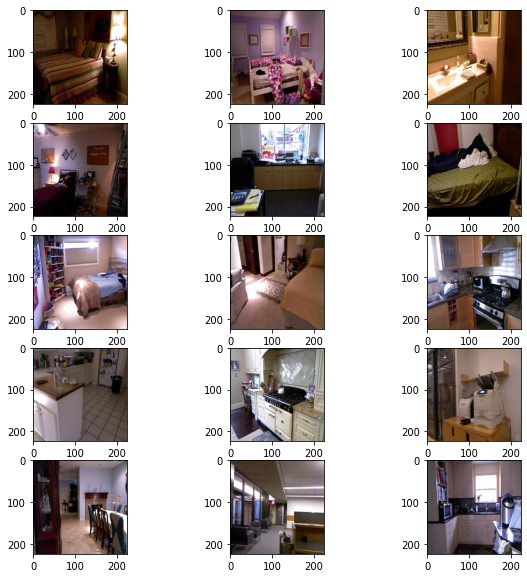

In [11]:
%cd /content

path_train = (train_df['img_path'])
path_valid = (val['img_path'])
path_test  = (test_df['img_path'])

back_list = []
#back_path = glob.glob('background_dacon/*.jpg')
back_path = glob.glob('clear/*.png')
for i in back_path:
    back_image = cv2.imread(i)
    back_image = cv2.cvtColor(back_image, cv2.COLOR_BGR2RGB)
    back_image = cv2.resize(back_image, (IMG_SIZE,IMG_SIZE))
    back_list.append(back_image)

fig = plt.figure(figsize=(10,10))
for i, img in enumerate(back_list[:15]):
    plt.subplot(5, 3, i+1)
    plt.imshow(img)
#plt.tight_layout()
#plt.show()

/content


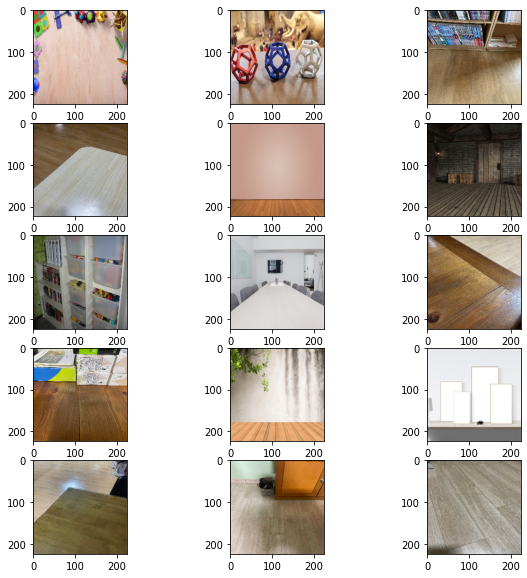

In [12]:
%cd /content

back_list_vali = []
#back_path = glob.glob('background_dacon/*.jpg')
back_path_vali = glob.glob('background_dacon/*.jpg')
for i in back_path_vali:
    back_image_vali = cv2.imread(i)
    back_image_vali = cv2.cvtColor(back_image_vali, cv2.COLOR_BGR2RGB)
    back_image_vali = cv2.resize(back_image_vali, (IMG_SIZE,IMG_SIZE))
    back_list_vali.append(back_image_vali)

fig = plt.figure(figsize=(10,10))
for i, img in enumerate(back_list_vali[:15]):
    plt.subplot(5, 3, i+1)
    plt.imshow(img)

In [13]:
def rotation(img, angle):
    h, w = img.shape[:2]
    M = cv2.getRotationMatrix2D((int(w/2), int(h/2)), angle, 1)
    img = cv2.warpAffine(img, M, (w, h))
    return img

def _bytes_feature(value):
    """Returns a bytes_list from a string / byte."""
    if isinstance(value, type(tf.constant(0))):
        value = value.numpy() # BytesList won't unpack a string from an EagerTensor.
    return tf.train.Feature(bytes_list=tf.train.BytesList(value=[value]))

def _float_feature(value):
    """Returns a float_list from a float / double."""
    return tf.train.Feature(float_list=tf.train.FloatList(value=[value]))

def _int64_feature(value):
    """Returns an int64_list from a bool / enum / int / uint."""
    return tf.train.Feature(int64_list=tf.train.Int64List(value=[value]))

#data augmentation

In [14]:
writer_image = tf.io.TFRecordWriter('image_train_aug.tfr')
count = 0
for i_, path_ in tqdm(enumerate(path_train)):
    j = i_%len(back_list)
    img = cv2.imread(path_)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_CUBIC)
    
    back_image = np.array(back_list[j])
    if count % 3 == 0 :
        back_image = tf.image.random_crop(value=back_image, size=(np.random.randint(112,224),np.random.randint(112,224),3 ) )
        back_image = cv2.resize(np.array(back_image), (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_CUBIC)
    if count % 5 == 0 :
        #back_image = rotation(back_image, 5)
        back_image = tf.image.random_brightness(back_image, max_delta=0.1)
        #dst = tf.image.random_brightness(image, max_delta=0.1)
    if count % 8 == 0 :
        #back_image = rotation(back_image, -5)
        back_image = tf.image.random_hue(back_image, 0.5)
        #dst = tf.image.random_contrast(image, lower=0.5, upper=1.5)
    back_image = np.array(back_image)
    back_image = cv2.cvtColor(back_image,cv2.COLOR_BGR2RGB)
    #dst = np.where(img>250, back_image, img)

    img_bin = np.array(img[:, :, 0] < 222, dtype=np.uint8) * 255 ############## erase grid
    img_blur = cv2.medianBlur(img_bin, 5)
    img_filter = img.copy()
    img_filter[img_blur == 0] = 0
    
    retval, labels, stats, centroids = cv2.connectedComponentsWithStats(img_blur)
    stats = np.array(stats)
    stats[0, -1] = 0
    label_idx = np.argmax(stats[:, -1])
    img_mask = labels == label_idx
    img_final = img_filter.copy()
    img_final[~img_mask] = (0, 0, 0)

    back_image[img_mask] = (0, 0, 0)
    img_final += back_image


    bimage = img_final.tobytes()
    count = count+1
            
    classes = np.array(train_df.loc[i_, 'A':'J'], dtype=np.uint8).tobytes()
    
    example = tf.train.Example(
        features=tf.train.Features(
            feature={
                'image': _bytes_feature(bimage),
                'classes': _bytes_feature(classes)
            }
            )
        )
    
    writer_image.write(example.SerializeToString())
    
writer_image.close()

0it [00:00, ?it/s]

In [15]:
writer_image_val = tf.io.TFRecordWriter('image_val1.tfr')
count = 0
for i_, path_ in tqdm(enumerate(path_valid)):
    j = i_%len(back_list_vali)
    img = cv2.imread(path_)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_CUBIC)
    
    back_image = np.array(back_list_vali[j])
    if count % 3 == 0 :
        back_image = tf.image.random_crop(value=back_image, size=(np.random.randint(112,224),np.random.randint(112,224),3 ) )
        back_image = cv2.resize(np.array(back_image), (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_CUBIC)
    if count % 5 == 0 :
        #back_image = rotation(back_image, 5)
        back_image = tf.image.random_brightness(back_image, max_delta=0.1)
        #dst = tf.image.random_brightness(image, max_delta=0.1)
    if count % 8 == 0 :
        #back_image = rotation(back_image, -5)
        back_image = tf.image.random_hue(back_image, 0.5)
        #dst = tf.image.random_contrast(image, lower=0.5, upper=1.5)
    back_image = np.array(back_image)
    back_image = cv2.cvtColor(back_image,cv2.COLOR_BGR2RGB)
    #dst = np.where(img>250, back_image, img)

    img_bin = np.array(img[:, :, 0] < 222, dtype=np.uint8) * 255 ############## erase grid
    img_blur = cv2.medianBlur(img_bin, 5)
    img_filter = img.copy()
    img_filter[img_blur == 0] = 0
    
    retval, labels, stats, centroids = cv2.connectedComponentsWithStats(img_blur)
    stats = np.array(stats)
    stats[0, -1] = 0
    label_idx = np.argmax(stats[:, -1])
    img_mask = labels == label_idx
    img_final = img_filter.copy()
    img_final[~img_mask] = (0, 0, 0)

    back_image[img_mask] = (0, 0, 0)
    img_final += back_image


    bimage = img_final.tobytes()
    count = count+1
    
    classes = np.array(val.loc[i_, 'A':'J'], dtype=np.uint8).tobytes()
    
    example = tf.train.Example(
        features=tf.train.Features(
            feature={
                'image': _bytes_feature(bimage),
                'classes': _bytes_feature(classes)
            }
            )
        )
    
    writer_image_val.write(example.SerializeToString())
    
writer_image_val.close()

0it [00:00, ?it/s]

In [16]:
"""
writer_image_val = tf.io.TFRecordWriter('image_val1.tfr')
for i_, path_ in tqdm(enumerate(path_valid)):
    j = i_%5
#     if i_ % 2 == 0: 
    img = cv2.imread(path_)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_CUBIC)
    dst = np.where(img>250, back_list[j], img)
    if count % 5 == 0 :
        dst = rotation(dst, -10)
    elif count % 8 == 0 :
        dst = rotation(dst, 10)
    elif count % 12 == 0 :
        dst = cv2.flip(dst, 1)
#     else :
#         img = cv2.imread(path_)
#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#         dst = cv2.resize(img, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_CUBIC)
    bimage = dst.tobytes()
    count = count+1
#     src = cv2.imread(path_)
#     dst = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
#     dst = cv2.resize(dst, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_CUBIC)
#     bimage = dst.tobytes()
    
    classes = np.array(val.loc[i_, 'A':'J'], dtype=np.uint8).tobytes()
    
    example = tf.train.Example(
        features=tf.train.Features(
            feature={
                'image': _bytes_feature(bimage),
                'classes': _bytes_feature(classes)
            }
            )
        )
    
    writer_image_val.write(example.SerializeToString())
    
writer_image_val.close()
"""

"\nwriter_image_val = tf.io.TFRecordWriter('image_val1.tfr')\nfor i_, path_ in tqdm(enumerate(path_valid)):\n    j = i_%5\n#     if i_ % 2 == 0: \n    img = cv2.imread(path_)\n    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)\n    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_CUBIC)\n    dst = np.where(img>250, back_list[j], img)\n    if count % 5 == 0 :\n        dst = rotation(dst, -10)\n    elif count % 8 == 0 :\n        dst = rotation(dst, 10)\n    elif count % 12 == 0 :\n        dst = cv2.flip(dst, 1)\n#     else :\n#         img = cv2.imread(path_)\n#         img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)\n#         dst = cv2.resize(img, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_CUBIC)\n    bimage = dst.tobytes()\n    count = count+1\n#     src = cv2.imread(path_)\n#     dst = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)\n#     dst = cv2.resize(dst, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_CUBIC)\n#     bimage = dst.tobytes()\n    \n    classes = np.array(val.loc[i

In [17]:
writer_image_test = tf.io.TFRecordWriter('image_test.tfr')
for i_, path_ in tqdm(enumerate(path_test)):

    src = cv2.imread(path_)
    dst = cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
    dst = cv2.resize(dst, (IMG_SIZE, IMG_SIZE), interpolation=cv2.INTER_CUBIC)
    bimage = dst.tobytes()
    
    example = tf.train.Example(
        features=tf.train.Features(
            feature={
                'image': _bytes_feature(bimage),
            }
            )
        )
    
    writer_image_test.write(example.SerializeToString())
    
writer_image_test.close()

0it [00:00, ?it/s]

In [18]:
def _parse_function(tfrecord_serialized):
    features={'image': tf.io.FixedLenFeature([], tf.string),
              'classes': tf.io.FixedLenFeature([], tf.string)
             }
    parsed_features = tf.io.parse_single_example(tfrecord_serialized, features)
    
    image = tf.io.decode_raw(parsed_features['image'], tf.uint8)
    image = tf.reshape(image, [IMG_SIZE, IMG_SIZE, 3])
#     image = tf.cast(image, tf.float32)/255. 

    classes = tf.io.decode_raw(parsed_features['classes'], tf.uint8)    
    classes = tf.squeeze(classes)

    return image, classes

def _parse_function2(tfrecord_serialized):
    features={'image': tf.io.FixedLenFeature([], tf.string)             }
    parsed_features = tf.io.parse_single_example(tfrecord_serialized, features)
    
    image = tf.io.decode_raw(parsed_features['image'], tf.uint8)
    image = tf.reshape(image, [IMG_SIZE, IMG_SIZE, 3])
#     image = tf.cast(image, tf.float32)/255. 

    return image

def augment_data(image, label):
    probability = 0.5
    pro = tf.random.uniform(shape=[], minval=0, maxval=1)
    if pro < 0.5 :
        image = tf.image.random_flip_left_right(image)
    
    return image, label

In [19]:
## train dataset 만들기
train_dataset = tf.data.TFRecordDataset('image_train_aug.tfr')
train_dataset = train_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
train_dataset = train_dataset.map(augment_data)
train_dataset = train_dataset.shuffle(1000).prefetch(tf.data.experimental.AUTOTUNE).batch(BATCH_SIZE)

## validation dataset 만들기
val_dataset = tf.data.TFRecordDataset('image_val1.tfr')
val_dataset = val_dataset.map(_parse_function, num_parallel_calls=tf.data.experimental.AUTOTUNE)
val_dataset = val_dataset.prefetch(tf.data.experimental.AUTOTUNE).batch(BATCH_SIZE)

## test dataset 만들기
test_dataset = tf.data.TFRecordDataset('image_test.tfr')
test_dataset = test_dataset.map(_parse_function2, num_parallel_calls=tf.data.experimental.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE)

print(train_dataset)
print(val_dataset)
print(test_dataset)

<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.uint8, name=None), TensorSpec(shape=<unknown>, dtype=tf.uint8, name=None))>
<BatchDataset element_spec=(TensorSpec(shape=(None, 224, 224, 3), dtype=tf.uint8, name=None), TensorSpec(shape=<unknown>, dtype=tf.uint8, name=None))>
<BatchDataset element_spec=TensorSpec(shape=(None, 224, 224, 3), dtype=tf.uint8, name=None)>


#model structure

In [6]:
IMG_SIZE =224

inputs = Input(shape = (IMG_SIZE, IMG_SIZE, 3))
x = vgg19.VGG19(weights='imagenet', include_top=False)(inputs, training=True)
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.2, seed=1234)(x)
# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.2, seed=1234)(x)
#x = Dense(128, activation='relu')(x)
output = Dense(10, activation='sigmoid')(x)

model = Model(inputs, output)

In [41]:

EarlyStop_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1) 

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                                                 patience=3, min_lr=1e-06)


checkpoint_path = "/content/drive/MyDrive/ColabNotebooks/multi-label-classification/vgg_q2l/last_model.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


my_callback=[EarlyStop_callback , lr_scheduler , cp_callback]

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer=tf.keras.optimizers.Adam(learning_rate= 1e-4 ), 
              metrics=['binary_accuracy'])  

In [42]:
history = model.fit(train_dataset,
                epochs=25,
                validation_data = val_dataset,
                callbacks=my_callback)

Epoch 1/25
   1650/Unknown - 832s 501ms/step - loss: 0.6289 - binary_accuracy: 0.6133
Epoch 1: saving model to /content/drive/MyDrive/ColabNotebooks/multi-label-classification/vgg19/last_model.ckpt
1650/1650 [==============================] - 901s 543ms/step - loss: 0.6289 - binary_accuracy: 0.6133 - val_loss: 0.5172 - val_binary_accuracy: 0.7176 - lr: 1.0000e-04
Epoch 2/25
1650/1650 [==============================] - ETA: 0s - loss: 0.3765 - binary_accuracy: 0.8106
Epoch 2: saving model to /content/drive/MyDrive/ColabNotebooks/multi-label-classification/vgg19/last_model.ckpt
1650/1650 [==============================] - 889s 539ms/step - loss: 0.3765 - binary_accuracy: 0.8106 - val_loss: 0.2682 - val_binary_accuracy: 0.8798 - lr: 1.0000e-04
Epoch 3/25
1650/1650 [==============================] - ETA: 0s - loss: 0.1989 - binary_accuracy: 0.9168
Epoch 3: saving model to /content/drive/MyDrive/ColabNotebooks/multi-label-classification/vgg19/last_model.ckpt
1650/1650 [=====================

In [43]:
model.load_weights(checkpoint_path)
model.evaluate(val_dataset)

413/413 [==============================] - 68s 165ms/step - loss: 0.1001 - binary_accuracy: 0.9847


[0.10014352202415466, 0.9846639633178711]

In [44]:
pred = model.predict(test_dataset)
pred = np.where(pred>0.5, 1, 0)
pred

92/92 [==============================] - 16s 170ms/step


array([[0, 1, 0, ..., 0, 1, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 1],
       ...,
       [0, 0, 1, ..., 1, 0, 1],
       [0, 1, 0, ..., 0, 1, 0],
       [1, 0, 1, ..., 0, 0, 0]])

In [47]:
submit = pd.read_csv('sample_submission.csv')

submit.iloc[:,1:] = pred
submit.head()

submit.to_csv('vgg19_demo_0129.csv', index=False)

In [ ]:
submit2=pd.read_csv('densenet201_demo_0128.csv')

labels = ['A','B','C','D','E','F','G','H','I','J']
cnt=0
temp=0
for i in range(1460):
  for j in range(10):
    temp =  submit[labels[j]][i] + submit2[labels[j]][i]
    if(temp==1):
      #submit[labels[j]][i]=1
      cnt+=1
    else:
      1
      #x[labels[j]][i]=0

print(cnt)

In [ ]:


real_ans_demo = [
    [2,7,9],
    [2,6],
    [1,2,4,5,6,8,10],
    [5,6,8,9],
    [2,5],
    [1,2,3,5,8,9],
    [10,9,8,6,3,4],
    [2,3,4,6,7,10],
    [1,2,3,4,5,6,10],
    [1,2,7],
    [5,9,10],
    [1,3,4,5,7],
    [1,2,3,4,7,9,10],
    [2,3,6],
    [1,2,3,5,9],
    [2,9],
    [4,5,10],
    [8,4,10,3,1,7],
    [2,4,5,6,7,9], #애매
    [2,3,5,6,9,8]
]

labels = ['A','B','C','D','E','F','G','H','I','J']
real_ans = np.zeros( [100,10] , dtype=int)

for i in range(len(real_ans_demo)):
  for j in real_ans_demo[i]:
    real_ans[i][j-1]=1

cnt=0

for i in range(len(real_ans_demo)): #1460
  print(i)
  print('예측    : ',end='')
  for j in range(10):
    cur = labels[j]
    print(submit[cur][i],end=' ')
  print()
  print('정답    : ',end='')
  for j in range(10):
    cur = labels[j]
    print(real_ans[i][j],end=' ')
    if(submit[cur][i]!=real_ans[i][j]):
      cnt+=1
  print()


print(cnt)

#잡동사니

In [20]:
IMG_SIZE =224

inputs = Input(shape = (IMG_SIZE, IMG_SIZE, 3))
x = vgg19.VGG19(weights='imagenet', include_top=False)(inputs, training=True)
x = GlobalAveragePooling2D()(x)
x = Dense(2048, activation='relu')(x)
x = Dropout(0.2, seed=1234)(x)
# x = Dense(1024, activation='relu')(x)
# x = Dropout(0.2, seed=1234)(x)
#x = Dense(128, activation='relu')(x)
output = Dense(10, activation='sigmoid')(x)

model1 = Model(inputs, output)


EarlyStop_callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)

def scheduler(epoch, lr):
    if epoch < 5:
        return lr
    else:
        return lr * tf.math.exp(-0.1) 

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(scheduler)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5,
                                                 patience=3, min_lr=1e-06)


checkpoint_path = "/content/drive/MyDrive/ColabNotebooks/multi-label-classification/vgg19/last_model.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# Create a callback that saves the model's weights
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)


my_callback=[EarlyStop_callback , lr_scheduler , cp_callback]

model1.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
              optimizer=tf.keras.optimizers.Adam(learning_rate= 1e-4 ), 
              metrics=['binary_accuracy'])  

80134624/80134624 [==============================] - 3s 0us/step


In [22]:
model_path1 =  "/content/drive/MyDrive/ColabNotebooks/multi-label-classification/vgg19/last_model.ckpt"
#model_path2 = ''

model1.load_weights(model_path1)

#model2.load_weights(model_path2)

pred1 = model1.predict(test_dataset)
#pred2 = model2.predict(test_dataset)

pred = pred1 #+ pred2

submit = pd.read_csv('sample_submission.csv')

submit.iloc[:,1:] = pred

submit.to_csv('vgg19_0129.csv', index=False)

92/92 [==============================] - 14s 155ms/step


array([[1.9477515e-01, 1.0000000e+00, 6.1852706e-04, ..., 8.3031235e-09,
        1.0000000e+00, 6.9131456e-05],
       [6.7219495e-05, 9.6748614e-01, 1.0414757e-06, ..., 1.7060060e-11,
        1.9963436e-06, 1.1429464e-03],
       [9.3479019e-01, 9.9999976e-01, 9.8209183e-09, ..., 5.6379032e-04,
        8.2563488e-08, 1.0000000e+00],
       ...,
       [2.2973806e-08, 3.9676670e-06, 1.0000000e+00, ..., 9.9999976e-01,
        5.0137001e-09, 9.9998009e-01],
       [1.4237881e-03, 1.0000000e+00, 4.4593129e-05, ..., 1.9267782e-08,
        9.9999869e-01, 1.3404728e-04],
       [9.9976104e-01, 1.9260862e-13, 9.9989557e-01, ..., 6.8321694e-15,
        7.0494589e-06, 3.0034050e-07]], dtype=float32)